In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 1: Load the dataset
file_path = '/content/PCA_results.8.csv'  # Replace with the path to your dataset
data = pd.read_csv(file_path)

In [ ]:
# Step 2: Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.274355 -0.096344  1.083427 -0.779993  0.733224  0.499635 -1.212490   
1  3.097952 -0.523544  1.495265 -0.142860  0.683907 -0.164014 -0.978976   
2  3.470452 -0.318442  1.639695 -0.478387  0.878706  0.271496 -0.161314   
3  3.197982 -0.301340  1.534107 -0.769627  0.886398  0.445042 -0.595537   
4  2.916098  0.137352  1.541440 -1.324139  0.369705  0.771748 -1.421975   

        PC8  label  
0  0.127588      1  
1  0.292278      1  
2  0.013030      1  
3  0.384700      1  
4  0.418969      1  


In [ ]:
# Step 3: Check for missing values
if data.isnull().sum().sum() > 0:
    print("Missing values detected. Filling with mean values...")
    data.fillna(data.mean(), inplace=True)
else:
    print("No missing values detected.")

No missing values detected.


In [ ]:
# Step 4: Separate features and labels
if 'label' in data.columns:
    features = data.drop(columns=['label'])  # Dropping the label column
    labels = data['label']
    print("Features and labels separated successfully.")
else:
    raise KeyError("'label' column not found in the dataset. Please ensure the dataset contains a 'label' column.")

Features and labels separated successfully.


In [ ]:
# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (140, 8)
Testing set size: (35, 8)


In [ ]:
# Step 6: Initialize the Random Forest model
n_estimators = 100  # Number of trees in the forest
random_forest = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
print(f"Initialized Random Forest with {n_estimators} estimators.")

Initialized Random Forest with 100 estimators.


In [ ]:
# Step 7: Train the Random Forest model
random_forest.fit(X_train, y_train)
print("Random Forest model trained successfully.")

Random Forest model trained successfully.


In [ ]:
# Step 8: Make predictions on the test set
y_pred = random_forest.predict(X_test)
print("Predictions made on the test set.")

Predictions made on the test set.


In [ ]:
# Step 9: Evaluate the Random Forest model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nRandom Forest Model Accuracy: {accuracy:.2f}")


Random Forest Model Accuracy: 0.80


In [ ]:
# Step 10: Display the classification report
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           2       1.00      0.50      0.67         2
           3       0.78      0.88      0.82         8
           4       1.00      1.00      1.00         2
           5       1.00      0.67      0.80         3
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       1.00      0.67      0.80         3
          12       0.50      1.00      0.67         1
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       0.50      1.00      0.67         2
          18       1.00      1.00      1.00         1

    accuracy                          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


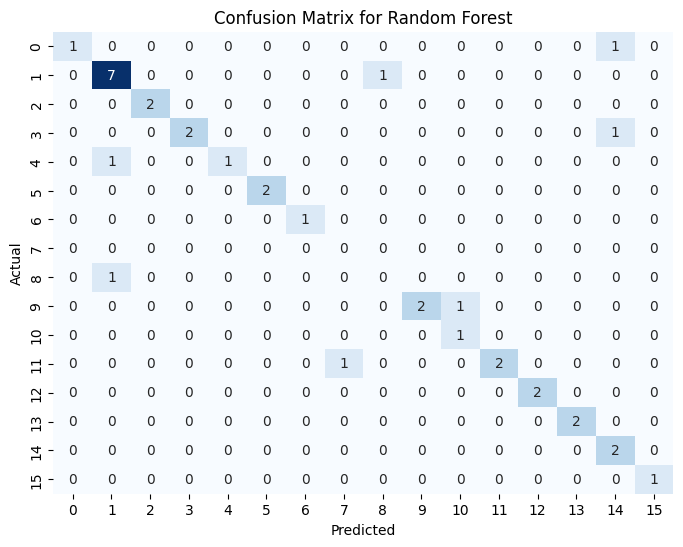

In [ ]:
# Step 11: Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

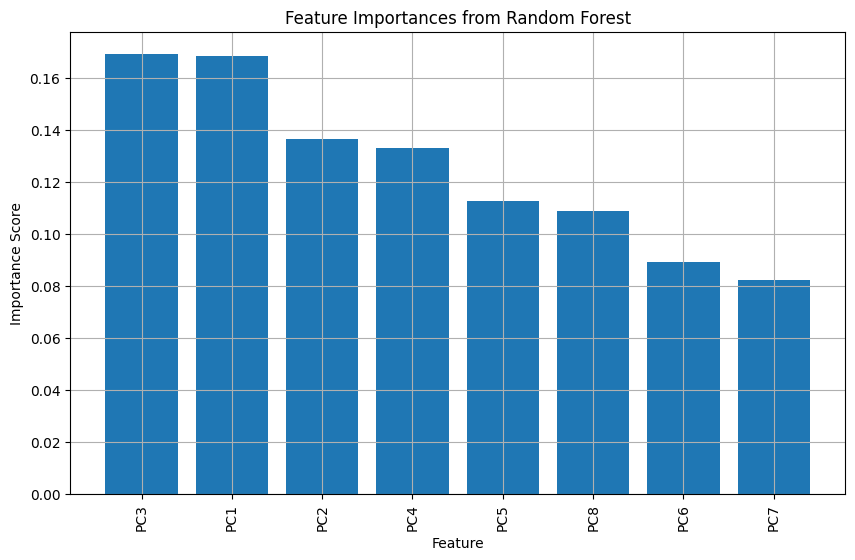

In [ ]:
# Step 12: Feature Importance
feature_importances = random_forest.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(features.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(features.shape[1]), features.columns[sorted_indices], rotation=90)
plt.title("Feature Importances from Random Forest")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.grid()
plt.show()

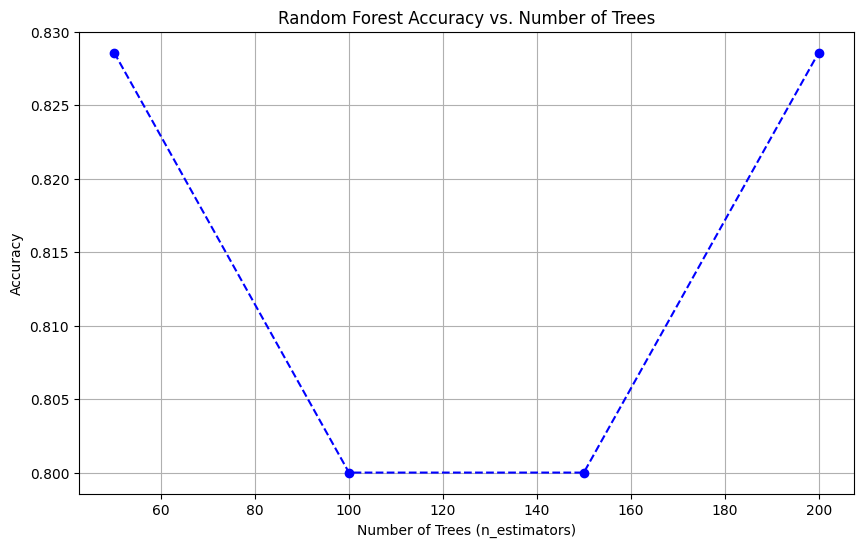

The best number of trees is 50 with an accuracy of 0.83.


In [ ]:
# Step 13: Visualize the OOB (Out-of-Bag) error, if enabled (optional)
if hasattr(random_forest, "oob_score_"):
    print(f"Out-of-Bag (OOB) Score: {random_forest.oob_score_:.2f}")

# Step 14: Tune Hyperparameters (Optional)
# Adjust the number of trees and other parameters to analyze the performance.
n_estimators_list = [50, 100, 150, 200]
accuracies = []

for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    temp_pred = rf.predict(X_test)
    accuracies.append(accuracy_score(y_test, temp_pred))

# Plotting the relationship between n_estimators and accuracy
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, accuracies, marker='o', linestyle='--', color='b')
plt.title("Random Forest Accuracy vs. Number of Trees")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

best_n_estimators = n_estimators_list[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"The best number of trees is {best_n_estimators} with an accuracy of {best_accuracy:.2f}.")